In [1]:
%load_ext autoreload
%autoreload 1
%aimport library
from library import *

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


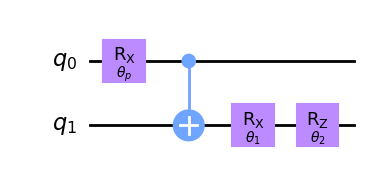

In [2]:
from qiskit.circuit import QuantumCircuit, Parameter

theta_1 = Parameter("$θ_1$")
theta_2 = Parameter("$θ_2$")
theta_p = Parameter("$θ_p$")

create_any_density_matrix = QuantumCircuit(2, name="V")
create_any_density_matrix.rx(theta_p, 0)
create_any_density_matrix.cx(0, 1)
create_any_density_matrix.rx(theta_1, 1)
create_any_density_matrix.rz(theta_2, 1)

display(create_any_density_matrix.draw())
create_any_density_matrix = create_any_density_matrix.to_instruction()


## proof that this circuit can create any density matrix

In [3]:
import sympy as sp

from sympy.physics.quantum import Dagger, TensorProduct

In [4]:
t_1, t_2, t_3, t_4 = sp.symbols("θ_1:5", real=True)
id = sp.Matrix([[1,0],[0,1]])
state = sp.Matrix([1,0,0,0])

In [5]:
op_3 = TensorProduct(sp.Matrix([[sp.cos(t_3/2), -sp.I * sp.sin(t_3/2)], [-sp.I * sp.sin(t_3/2), sp.cos(t_3/2)]]), id)
display(op_3)
state = op_3 @ state
display(state)

Matrix([
[   cos(θ_3/2),             0, -I*sin(θ_3/2),             0],
[            0,    cos(θ_3/2),             0, -I*sin(θ_3/2)],
[-I*sin(θ_3/2),             0,    cos(θ_3/2),             0],
[            0, -I*sin(θ_3/2),             0,    cos(θ_3/2)]])

Matrix([
[   cos(θ_3/2)],
[            0],
[-I*sin(θ_3/2)],
[            0]])

In [6]:
op_4 = sp.Matrix([[1,0,0,0],
                  [0,1,0,0],
                  [0,0,0,1],
                  [0,0,1,0]])
state = op_4 @ state
state

Matrix([
[   cos(θ_3/2)],
[            0],
[            0],
[-I*sin(θ_3/2)]])

In [7]:

op_1 = TensorProduct(id, sp.Matrix([[sp.cos(t_1/2), -sp.I * sp.sin(t_1/2)], [-sp.I * sp.sin(t_1/2), sp.cos(t_1/2)]]) )
display(op_1)
state = op_1 @ state
display(state)

Matrix([
[   cos(θ_1/2), -I*sin(θ_1/2),             0,             0],
[-I*sin(θ_1/2),    cos(θ_1/2),             0,             0],
[            0,             0,    cos(θ_1/2), -I*sin(θ_1/2)],
[            0,             0, -I*sin(θ_1/2),    cos(θ_1/2)]])

Matrix([
[   cos(θ_1/2)*cos(θ_3/2)],
[-I*sin(θ_1/2)*cos(θ_3/2)],
[  -sin(θ_1/2)*sin(θ_3/2)],
[-I*sin(θ_3/2)*cos(θ_1/2)]])

In [8]:
op_2 = TensorProduct(id, sp.Matrix([[sp.exp(-sp.I * t_2/2) , 0], [0, sp.exp(-sp.I * t_2/2)]]) )
state = op_2 @ state

In [9]:
display(state)

Matrix([
[   exp(-I*θ_2/2)*cos(θ_1/2)*cos(θ_3/2)],
[-I*exp(-I*θ_2/2)*sin(θ_1/2)*cos(θ_3/2)],
[  -exp(-I*θ_2/2)*sin(θ_1/2)*sin(θ_3/2)],
[-I*exp(-I*θ_2/2)*sin(θ_3/2)*cos(θ_1/2)]])

In [10]:
# create the density matrix
state_qubit_1 = sp.Matrix(state[:2]) / sp.cos(t_3/2)
state_qubit_1_perp = sp.Matrix(state[2:]) / sp.sin(t_3/2)
probability = abs(sp.cos(t_3/2)**2)

# sind sie auch tatsächlich orthogonal?
print(Dagger(state_qubit_1) @ state_qubit_1_perp)
assert (Dagger(state_qubit_1) @ state_qubit_1_perp)[0,0] == 0, "Error in the algorithm. the two states for q1 should be orthogonal"

Matrix([[0]])


In [11]:
display(state_qubit_1)
display(state_qubit_1_perp)

Matrix([
[   exp(-I*θ_2/2)*cos(θ_1/2)],
[-I*exp(-I*θ_2/2)*sin(θ_1/2)]])

Matrix([
[  -exp(-I*θ_2/2)*sin(θ_1/2)],
[-I*exp(-I*θ_2/2)*cos(θ_1/2)]])

With the first two gates we can put the qubits in a supperposition of perpendicular states such that the probability of 00 $p=|\cos(\theta_3/2)|**2$ is the probability of the first desired state of the density matrix (when writing it in diagonal form). With the last gate we turn that state on q1 by mapping $|0\rangle$ to the state that should have probability $p$. Since the rotation is unitary, $|1\rangle$ will get mapped to the other possible state of the density matrix. when tracing over q0, we get the right density matrix. Therefore any density matrix is possible.

## optimizing the environment circuit

In [12]:
U_1, U = generate_custome_gates(0.2)
V = create_any_density_matrix
# initial params can be changed to test the functions for other values
params = {theta_p:0, theta_1:1, theta_2:0}


In [13]:
trace_circuits = get_circuits_for_V_optimization(U,V)

/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/qiskit/visualization/circuit/qcstyle.py:315: UserWarning: style option/s (usepiformat, latexdrawerstyle) is/are not supported
  set_style(current_style, json_style)


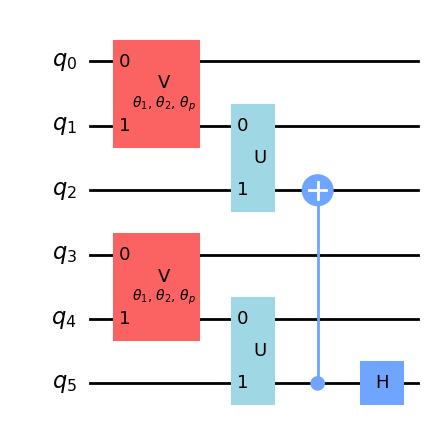

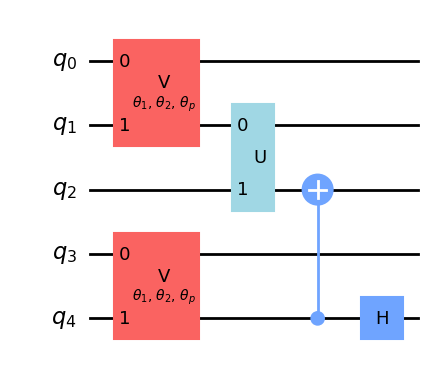

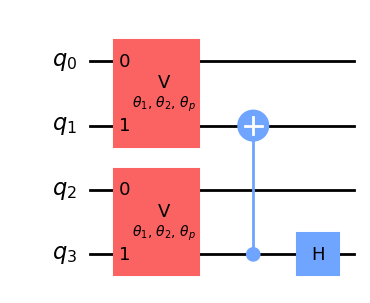

In [14]:
for circ, _,_ in trace_circuits:
    display(circ.draw())
None

## compare implementations of estimate_trace_of_difference

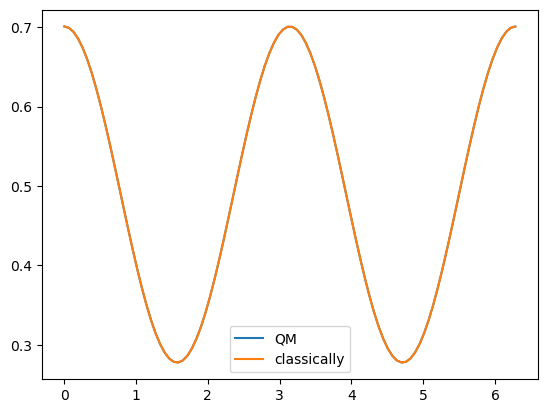

In [15]:
theta_range = np.linspace(0,2*np.pi, 100)
key = theta_p
plt.plot(theta_range, [estimate_trace_of_difference(U,V,{**params, key:theta, theta_1:2}) for theta in theta_range], label="QM")
plt.plot(theta_range, [estimate_trace_of_difference_classically(U,V,{**params, key:theta, theta_1:2}) for theta in theta_range], label="classically")
plt.legend()
plt.show()

In [16]:
compare_functions(lambda theta: estimate_trace_of_difference(U,V,{**params, theta_p:theta}),
                  lambda theta: estimate_trace_of_difference_classically(U,V,{**params, theta_p:theta}),
                  tol=1e-9)

True

# optimization

In [17]:
print("current trace of difference:", estimate_trace_of_difference(U,V,params))

current trace of difference: 0.6480326303438095


In [18]:
params = find_environment_V(U, V, params)
params

{Parameter($θ_p$): 0, Parameter($θ_1$): 1, Parameter($θ_2$): 0} (2.2887833992611187e-16, 1.8157749899217608, 0.627195441041383, -3.141592653589793)
new $θ_2$: 1.5707963267948952
{Parameter($θ_p$): 0, Parameter($θ_1$): 1, Parameter($θ_2$): 1.5707963267948952} (0.22222222222222204, -1.5707963267948966, 0.7453559924999296, 3.141592653589793)
new $θ_1$: 2.147021296970609
{Parameter($θ_p$): 0, Parameter($θ_1$): 2.147021296970609, Parameter($θ_2$): 1.5707963267948952} (0.184027777777778, 1.5707963267948966, 0.6250000000000004, -1.5707963267948966)
new $θ_p$: 5.726585989169349


/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/scipy/interpolate/_polyint.py:567: RuntimeWarning: divide by zero encountered in scalar divide
  self._inv_capacity = 4.0 / (np.max(self.xi) - np.min(self.xi))
/home/leo/Daten/.miniconda3/envs/qiskit-env/lib/python3.11/site-packages/scipy/interpolate/_polyint.py:574: RuntimeWarning: invalid value encountered in multiply
  dist = self._inv_capacity * (self.xi[i] - self.xi[permute])


{Parameter($θ_p$): 5.726585989169349, Parameter($θ_1$): 2.147021296970609, Parameter($θ_2$): 1.5707963267948952} (1.6653345369377348e-16, 0.0, 0.5306603773584864, 3.141592653589793)
new $θ_2$: 1.5707963267948934
{Parameter($θ_p$): 5.726585989169349, Parameter($θ_1$): 2.147021296970609, Parameter($θ_2$): 1.5707963267948934} (0.16019935920256018, -1.570796326794899, 0.6328494275942738, -3.141592653589793)
new $θ_1$: 1.413131901933232
{Parameter($θ_p$): 5.726585989169349, Parameter($θ_1$): 1.413131901933232, Parameter($θ_2$): 1.5707963267948934} (0.2445216049382739, 1.5707963267948966, 0.7361111111111152, -1.5707963267948966)
new $θ_p$: 5.564395779276632
{Parameter($θ_p$): 5.564395779276632, Parameter($θ_1$): 1.413131901933232, Parameter($θ_2$): 1.5707963267948934} (2.0014830212433605e-16, -0.982793723247329, 0.5539996844430471, 3.141592653589793)
new $θ_2$: 1.5707963267948946
{Parameter($θ_p$): 5.564395779276632, Parameter($θ_1$): 1.413131901933232, Parameter($θ_2$): 1.5707963267948946} 

{Parameter($θ_p$): 5.553457650952633,
 Parameter($θ_1$): 1.5707963267948832,
 Parameter($θ_2$): 1.5707963267948946}

In [19]:
estimate_trace_of_difference(U,V,params)

-2.220446049250313e-16

## compare resulting density matrices

In [20]:
trace, σ, ρ = estimate_trace_of_difference_classically(U,V,params, return_density_matrices=True)
print("trace:", trace)
print("σ", σ, sep="\n")
print("ρ:", ρ, sep="\n")
# we want to minimize:
(σ - ρ).max()

trace: 2.962971717406555e-20
σ
[[0.5     +0.j 0.372678+0.j]
 [0.372678+0.j 0.5     +0.j]]
ρ:
[[0.5     +0.j 0.372678+0.j]
 [0.372678+0.j 0.5     +0.j]]


0j